In [1]:
import keras
import tensorflow
import mnist

Using TensorFlow backend.


In [2]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
!pip install mnist keras tensorflow

In [37]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

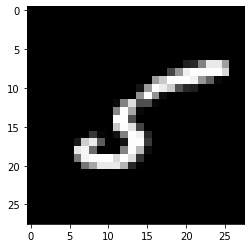

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [39]:
# Normalize the images.
train_images = (train_images / 255) - 5
test_images = (test_images / 255) - 5

In [40]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [44]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [46]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [47]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 1.3560 - accuracy: 0.8241 1s - loss: 1.8 - ETA: 0s
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.3220 - accuracy: 0.9158
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2466 - accuracy: 0.9338
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2027 - accuracy: 0.9446
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1760 - accuracy: 0.9506 0s


In [48]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 36us/step


[0.17712993544805794, 0.9521999955177307]

In [52]:
test_images[0].reshape((28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

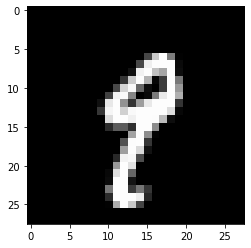

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = test_images[78]
plt.imshow(first_image.reshape((28,28)), cmap='gray')
plt.show()

In [72]:
np.argmax(model.predict(test_images[78].reshape((-1,784))))

9

In [49]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]
